In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import sigma_clip
from astropy.visualization import MinMaxInterval

In [2]:
sims = np.load("ExampleDataset/CONFIGURATION_1_images.npy")
real = np.load("/Parent/Stamps/Code/data/4band_clean_images.npy")

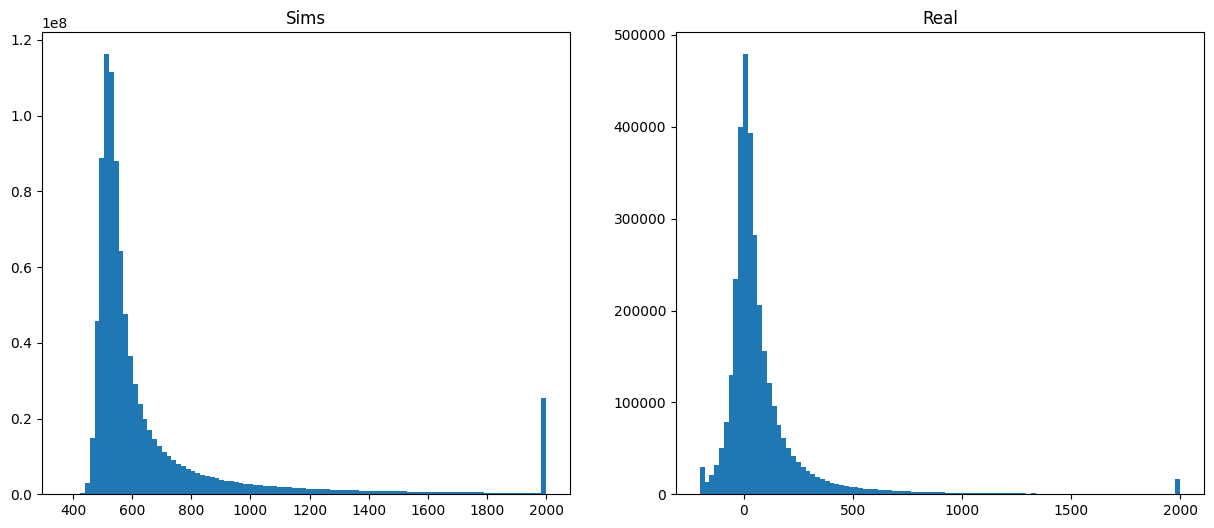

In [13]:
a_min = -200
a_max = 2000

fig, axs = plt.subplots(1, 2, figsize = (15,6))
axs[0].hist(np.clip(sims, a_min = a_min, a_max=a_max).ravel(), bins=100)
axs[0].set_title("Sims")
axs[1].hist(np.clip(real, a_min = a_min, a_max=a_max).ravel(), bins=100)
axs[1].set_title("Real")
plt.show()

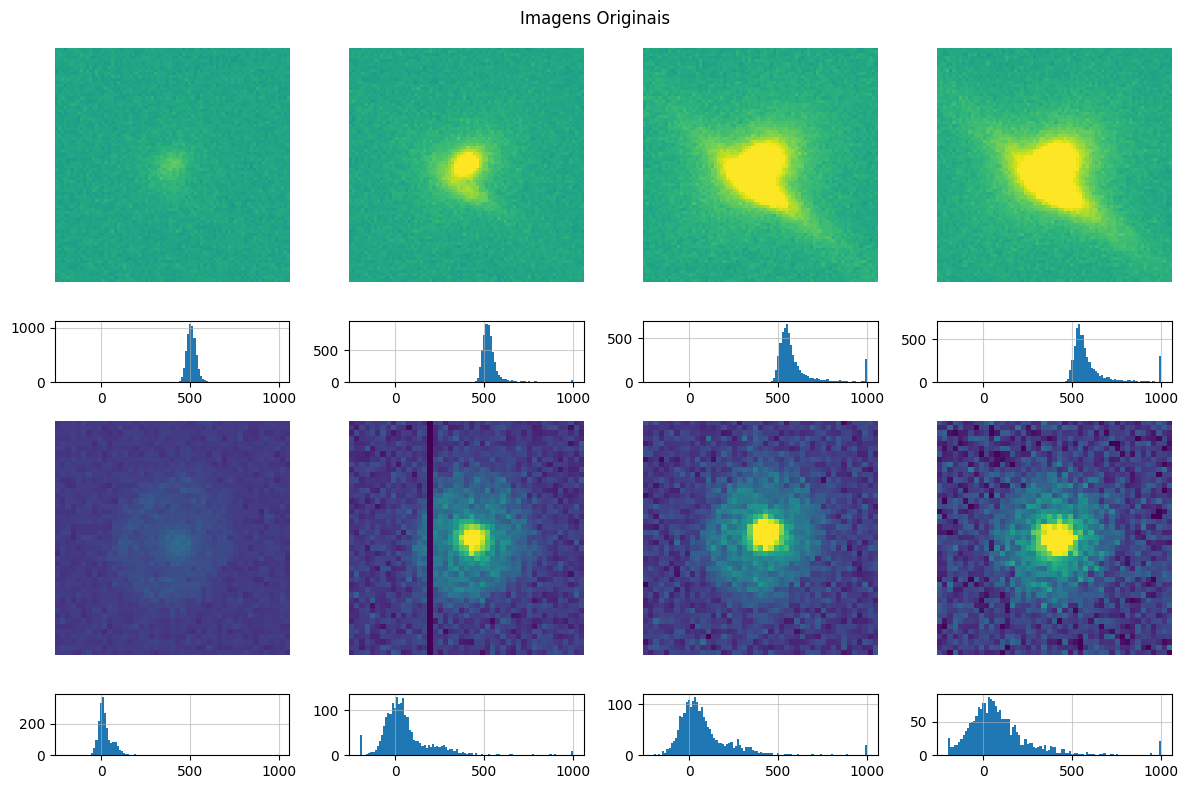

In [24]:
#sims_idx = np.random.randint(0, len(sims))
#real_idx = np.random.randint(0, len(real))

sim_img = sims[sims_idx]
real_img = real[real_idx]
#sim_img = clip_sims[sims_idx]
#real_img = clip_real[real_idx]

real_img = np.clip(real_img, -200, 1000)
sim_img = np.clip(sim_img, -200, 1000)

#color scale normalization
v_min = min(np.min(sim_img), np.min(real_img))
v_max = max(np.max(sim_img), np.max(real_img))
bins = 100

fig, axs = plt.subplots(4, 4, figsize=(12, 8), height_ratios=[4, 1, 4, 1])
fig.suptitle("Imagens Originais")
axs[0,0].imshow(sim_img[0], vmin=v_min, vmax=v_max)
axs[0,0].axis("off")
axs[1,0].hist(sim_img[0].ravel(), bins=bins, range=[v_min,v_max])
#axs[1,0].tick_params(axis='both', which='major', labelsize=24)
axs[1,0].grid(alpha=0.6)


axs[0,1].imshow(sim_img[1], vmin=v_min, vmax=v_max)
axs[0,1].axis("off")
axs[1,1].hist(sim_img[1].ravel(), bins=bins, range=[v_min,v_max])
#axs[1,1].tick_params(axis='both', which='major', labelsize=24)
axs[1,1].grid(alpha=0.6)


axs[0,2].imshow(sim_img[2], vmin=v_min, vmax=v_max)
axs[0,2].axis("off")
axs[1,2].hist(sim_img[2].ravel(), bins=bins, range=[v_min,v_max])
#axs[1,2].tick_params(axis='both', which='major', labelsize=24)
axs[1,2].grid(alpha=0.6)


axs[0,3].imshow(sim_img[3], vmin=v_min, vmax=v_max)
axs[0,3].axis("off")
axs[1,3].hist(sim_img[3].ravel(), bins=bins, range=[v_min,v_max])
#axs[1,3].tick_params(axis='both', which='major', labelsize=24)
axs[1,3].grid(alpha=0.6)


axs[2,0].imshow(real_img[0], vmin=v_min, vmax=v_max)
axs[2,0].axis("off")
axs[3,0].hist(real_img[0].ravel(), bins=bins, range=[v_min,v_max])
#axs[3,0].tick_params(axis='both', which='major', labelsize=24)
axs[3,0].grid(alpha=0.6)

axs[2,1].imshow(real_img[1], vmin=v_min, vmax=v_max)
axs[2,1].axis("off")
axs[3,1].hist(real_img[1].ravel(), bins=bins, range=[v_min,v_max])
#axs[3,1].tick_params(axis='both', which='major', labelsize=24)
axs[3,1].grid(alpha=0.6)

axs[2,2].imshow(real_img[2], vmin=v_min, vmax=v_max)
axs[2,2].axis("off")
axs[3,2].hist(real_img[2].ravel(), bins=bins, range=[v_min,v_max])
#axs[3,2].tick_params(axis='both', which='major', labelsize=24)
axs[3,2].grid(alpha=0.6)

axs[2,3].imshow(real_img[3], vmin=v_min, vmax=v_max)
axs[2,3].axis("off")
axs[3,3].hist(real_img[3].ravel(), bins=bins, range=[v_min,v_max])
#axs[3,3].tick_params(axis='both', which='major', labelsize=24)
axs[3,3].grid(alpha=0.6)


plt.tight_layout()
#plt.savefig("img.jpg", format="jpg")

In [5]:
def sigma_clip_bg(img):
    clipped_image = sigma_clip(img, 
                               sigma=3, 
                               maxiters=None, 
                               cenfunc='median', 
                               masked=True, 
                               copy=False)

    # clipped image contém somente pixels do céu 
    # Note que a imagem parece mais clara, mas é só uma redefinição nos limites do colormap do plot
    # agora calculamos o valor médio desses pixeis
    sky_mean = np.mean(clipped_image)
    sky_std = np.std(clipped_image)

    # e Subtraímos a média da imagem 
    sub_img = img - sky_mean

    # E clipamos valores acima de 100 sigma
    sigma_clipped_img = np.clip(sub_img, a_min=None, a_max=100*sky_std)
    
    return sigma_clipped_img


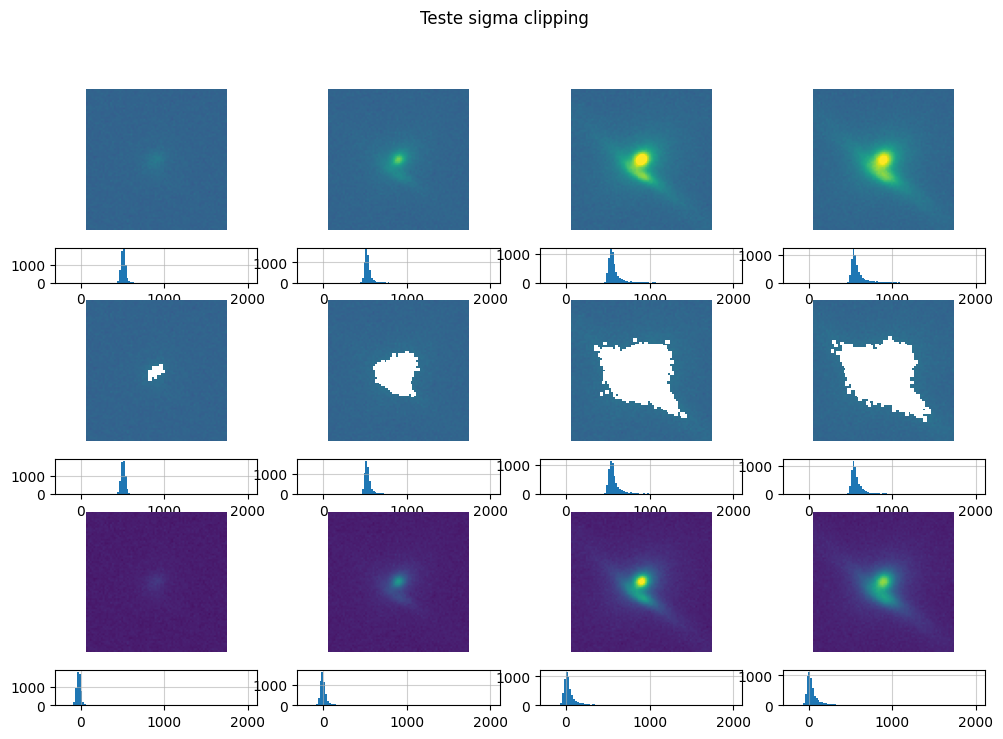

In [27]:
#sims = np.clip(sims, a_min=None, a_max=2000)

#sims_idx = np.random.randint(0, len(sims))

sig_up = 3
sig_lo = 10

sim_img = sims[sims_idx]
bg_img = sigma_clip(sim_img, sigma_lower=sig_lo, sigma_upper=sig_up)
clip_img = sigma_clip_bg(sim_img)

#color scale normalization
#v_min = np.min(sims[sims_idx])#, np.min(real[real_idx]))
#v_max = np.max(sims[sims_idx])#, np.max(real[real_idx]))
v_min = -200
v_max = 2000
bins = 100

fig, axs = plt.subplots(6, 4, figsize=(12, 8), height_ratios=[4, 1, 4, 1, 4, 1])
fig.suptitle("Teste sigma clipping")
axs[0,0].imshow(sim_img[0], vmin=v_min, vmax=v_max)
axs[0,0].axis("off")
axs[1,0].hist(sim_img[0].ravel(), bins=bins, range=[v_min,v_max])
#axs[1,0].tick_params(axis='both', which='major', labelsize=24)
axs[1,0].grid(alpha=0.6)

axs[0,1].imshow(sim_img[1], vmin=v_min, vmax=v_max)
axs[0,1].axis("off")
axs[1,1].hist(sim_img[1].ravel(), bins=bins, range=[v_min,v_max])
#axs[1,1].tick_params(axis='both', which='major', labelsize=24)
axs[1,1].grid(alpha=0.6)

axs[0,2].imshow(sim_img[2], vmin=v_min, vmax=v_max)
axs[0,2].axis("off")
axs[1,2].hist(sim_img[2].ravel(), bins=bins, range=[v_min,v_max])
#axs[1,2].tick_params(axis='both', which='major', labelsize=24)
axs[1,2].grid(alpha=0.6)

axs[0,3].imshow(sim_img[3], vmin=v_min, vmax=v_max)
axs[0,3].axis("off")
axs[1,3].hist(sim_img[3].ravel(), bins=bins, range=[v_min,v_max])
#axs[1,3].tick_params(axis='both', which='major', labelsize=24)
axs[1,3].grid(alpha=0.6)

axs[2,0].imshow(bg_img[0], vmin=v_min, vmax=v_max)
axs[2,0].axis("off")
axs[3,0].hist(bg_img[0].ravel(), bins=bins, range=[v_min,v_max])
#axs[3,0].tick_params(axis='both', which='major', labelsize=24)
axs[3,0].grid(alpha=0.6)

axs[2,1].imshow(bg_img[1], vmin=v_min, vmax=v_max)
axs[2,1].axis("off")
axs[3,1].hist(bg_img[1].ravel(), bins=bins, range=[v_min,v_max])
#axs[3,1].tick_params(axis='both', which='major', labelsize=24)
axs[3,1].grid(alpha=0.6)

axs[2,2].imshow(bg_img[2], vmin=v_min, vmax=v_max)
axs[2,2].axis("off")
axs[3,2].hist(bg_img[2].ravel(), bins=bins, range=[v_min,v_max])
#axs[3,2].tick_params(axis='both', which='major', labelsize=24)
axs[3,2].grid(alpha=0.6)

axs[2,3].imshow(bg_img[3], vmin=v_min, vmax=v_max)
axs[2,3].axis("off")
axs[3,3].hist(bg_img[3].ravel(), bins=bins, range=[v_min,v_max])
#axs[3,3].tick_params(axis='both', which='major', labelsize=24)
axs[3,3].grid(alpha=0.6)


axs[4,0].imshow(clip_img[0], vmin=v_min, vmax=v_max)
axs[4,0].axis("off")
axs[5,0].hist(clip_img[0].ravel(), bins=bins, range=[v_min,v_max])
#axs[5,0].tick_params(axis='both', which='major', labelsize=24)
axs[5,0].grid(alpha=0.6)

axs[4,1].imshow(clip_img[1], vmin=v_min, vmax=v_max)
axs[4,1].axis("off")
axs[5,1].hist(clip_img[1].ravel(), bins=bins, range=[v_min,v_max])
#axs[5,1].tick_params(axis='both', which='major', labelsize=24)
axs[5,1].grid(alpha=0.6)

axs[4,2].imshow(clip_img[2], vmin=v_min, vmax=v_max)
axs[4,2].axis("off")
axs[5,2].hist(clip_img[2].ravel(), bins=bins, range=[v_min,v_max])
#axs[5,2].tick_params(axis='both', which='major', labelsize=24)
axs[5,2].grid(alpha=0.6)

axs[4,3].imshow(clip_img[3], vmin=v_min, vmax=v_max)
axs[4,3].axis("off")
axs[5,3].hist(clip_img[3].ravel(), bins=bins, range=[v_min,v_max])
#axs[5,3].tick_params(axis='both', which='major', labelsize=24)
axs[5,3].grid(alpha=0.6)


#plt.tight_layout()
#plt.savefig("img.jpg", format="jpg")

#plt.tight_layout()
#plt.savefig("img.jpg", format="jpg")

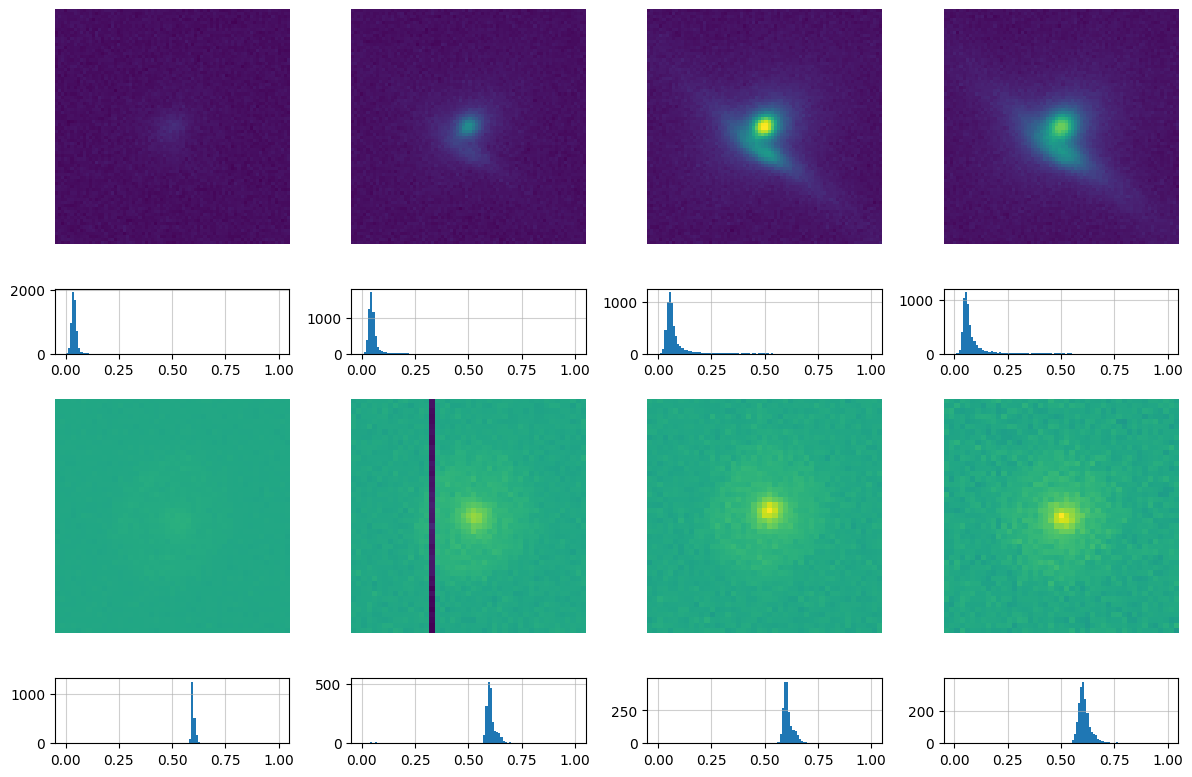

In [26]:
#sims_idx = np.random.randint(0, len(sims))
#real_idx = np.random.randint(0, len(real))

sim_img = sims[sims_idx]
real_img = real[real_idx]

clip_img = sigma_clip_bg(sim_img)

# normalization
normalize = MinMaxInterval()
clip_img = normalize(clip_img)
real_img = normalize(real_img)

#color scale normalization
v_min = min(np.min(clip_img), np.min(real_img))
v_max = max(np.max(clip_img), np.max(real_img))
bins = 100

fig, axs = plt.subplots(4, 4, figsize=(12, 8), height_ratios=[4, 1, 4, 1])

axs[0,0].imshow(clip_img[0], vmin=v_min, vmax=v_max)
axs[0,0].axis("off")
axs[1,0].hist(clip_img[0].ravel(), bins=bins, range=[v_min,v_max])
#axs[1,0].tick_params(axis='both', which='major', labelsize=24)
axs[1,0].grid(alpha=0.6)


axs[0,1].imshow(clip_img[1], vmin=v_min, vmax=v_max)
axs[0,1].axis("off")
axs[1,1].hist(clip_img[1].ravel(), bins=bins, range=[v_min,v_max])
#axs[1,1].tick_params(axis='both', which='major', labelsize=24)
axs[1,1].grid(alpha=0.6)


axs[0,2].imshow(clip_img[2], vmin=v_min, vmax=v_max)
axs[0,2].axis("off")
axs[1,2].hist(clip_img[2].ravel(), bins=bins, range=[v_min,v_max])
#axs[1,2].tick_params(axis='both', which='major', labelsize=24)
axs[1,2].grid(alpha=0.6)


axs[0,3].imshow(clip_img[3], vmin=v_min, vmax=v_max)
axs[0,3].axis("off")
axs[1,3].hist(clip_img[3].ravel(), bins=bins, range=[v_min,v_max])
#axs[1,3].tick_params(axis='both', which='major', labelsize=24)
axs[1,3].grid(alpha=0.6)


axs[2,0].imshow(real_img[0], vmin=v_min, vmax=v_max)
axs[2,0].axis("off")
axs[3,0].hist(real_img[0].ravel(), bins=bins, range=[v_min,v_max])
#axs[3,0].tick_params(axis='both', which='major', labelsize=24)
axs[3,0].grid(alpha=0.6)

axs[2,1].imshow(real_img[1], vmin=v_min, vmax=v_max)
axs[2,1].axis("off")
axs[3,1].hist(real_img[1].ravel(), bins=bins, range=[v_min,v_max])
#axs[3,1].tick_params(axis='both', which='major', labelsize=24)
axs[3,1].grid(alpha=0.6)

axs[2,2].imshow(real_img[2], vmin=v_min, vmax=v_max)
axs[2,2].axis("off")
axs[3,2].hist(real_img[2].ravel(), bins=bins, range=[v_min,v_max])
#axs[3,2].tick_params(axis='both', which='major', labelsize=24)
axs[3,2].grid(alpha=0.6)

axs[2,3].imshow(real_img[3], vmin=v_min, vmax=v_max)
axs[2,3].axis("off")
axs[3,3].hist(real_img[3].ravel(), bins=bins, range=[v_min,v_max])
#axs[3,3].tick_params(axis='both', which='major', labelsize=24)
axs[3,3].grid(alpha=0.6)


plt.tight_layout()
#plt.savefig("img.jpg", format="jpg")